# Ejercicio de desbalanceo
### Autores:


*   Ignacio Ruiz Chicano
*   Juan Jesús Torralba Mateos
*   Ana Gil Molina



## Instalación de librerías

In [2]:
!pip install imbalanced-learn

In [3]:
!pip install scikit-multilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 5.9 MB/s eta 0:00:00


In [57]:
# Librerías necesarias

import pandas as pd
print("pandas: "+str(pd.__version__))
import matplotlib
print("matplotlib: "+str(matplotlib.__version__))
import matplotlib.pyplot as plt
import numpy as np
print("numpy: "+str(np.__version__))
import sklearn
print("sklearn: "+str(sklearn.__version__))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
import seaborn as sns
print("seaborn: "+str(sns.__version__))
import scipy.stats as stats
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, hamming_loss, make_scorer
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
import imblearn
print("imblearn: "+str(imblearn.__version__))
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.under_sampling import CondensedNearestNeighbour, EditedNearestNeighbours
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from sklearn.multioutput import MultiOutputClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import learning_curve
from scipy import stats
import joblib
print("joblib: "+str(joblib.__version__))
from sklearn.model_selection import StratifiedKFold
import os
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

pandas: 2.2.2
matplotlib: 3.8.0
numpy: 1.26.4
sklearn: 1.5.2
seaborn: 0.13.2
imblearn: 0.12.4
joblib: 1.4.2


## Rutas

In [ ]:
ruta_dataset='./CocheRadar.csv' # Ruta al csv del dataset
ruta_modelos='./Modelos' # Ruta a la carpeta de los modelos

if not os.path.exists(ruta_modelos): # Se crea la carpeta si no existe, en principio no debería crearse nunca ya que la carpeta se adjunta
  os.mkdir(ruta_modelos)

In [5]:
# Establecemos una semilla
semilla = 123
np.random.seed(semilla)

## Descripción del dataset

El dataset Radar\-Coches, es un dataset que permite distinguir a un coche de cualquier otro

vehículo en función de ciertas características que se describen en estos 18 atributos todos

numéricos:

\- Compacto

\- Circularidad

\- Distancia\_circular

\- Relación\_radio

\- Relación\_aspecto\_praxis

\- Relación\_aspecto\_longitud\_máx

\- Relación\_dispersión

\- Alargamiento

\- Praxis\_rectangular

\- Longitud\_rectangular

\- Varianza\_mayor

\- Varianza\_menor

\- Rotación\_radio

\- Asimetría\_mayor

\- Asimetría\_menor

\- Curtosis\_meno

\- Curtosis\_mayor

\- huecos

El atributo objetivo es clasificar según esos atributos el tipo del vehículos entre un coche y otros vehículos.



## Preprocesamiento y análisis

In [6]:
# Se carga el dataset
cocheRadarDF = pd.read_csv(ruta_dataset)

In [7]:
# Se muestran las primeras 5 filas
cocheRadarDF.head()

,Compacto,Circularidad,Distancia_circular,Relación_radio,Relación_aspecto_praxis,Relación_aspecto_longitud_máx,Relación_dispersión,Alargamiento,Praxis_rectangular,Longitud_rectangular,Varianza_mayor,Varianza_menor,Rotación_radio,Asimetría_mayor,Asimetría_menor,Curtosis_menor,Curtosis_mayor,huecos,tipo
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,otros
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,otros
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,coche
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,otros
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,otros


In [8]:
# Se muestra la última columna, es decir, el objeto a clasificar
tipo_dato = cocheRadarDF.iloc[:, -1]
print(tipo_dato)

0      otros
1      otros
2      coche
3      otros
4      otros
       ...  
841    coche
842    otros
843    coche
844    coche
845    otros
Name: tipo, Length: 846, dtype: object


In [9]:
# Se muestran los tipos de los datos, no hay variables categóricas
cocheRadarDF.dtypes

,0
Compacto,int64
Circularidad,int64
Distancia_circular,int64
Relación_radio,int64
Relación_aspecto_praxis,int64
Relación_aspecto_longitud_máx,int64
Relación_dispersión,int64
Alargamiento,int64
Praxis_rectangular,int64
Longitud_rectangular,int64


Todas las variables (sin contar la objetivo) son variables numéricas. Es decir, no hay ninguna categórica.

In [10]:
# Se comprueba si hay nulos. Como se ve, no hay ninguno
cocheRadarDF.info()
cocheRadarDF.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Compacto                       846 non-null    int64 
 1   Circularidad                   846 non-null    int64 
 2   Distancia_circular             846 non-null    int64 
 3   Relación_radio                 846 non-null    int64 
 4   Relación_aspecto_praxis        846 non-null    int64 
 5   Relación_aspecto_longitud_máx  846 non-null    int64 
 6   Relación_dispersión            846 non-null    int64 
 7   Alargamiento                   846 non-null    int64 
 8   Praxis_rectangular             846 non-null    int64 
 9   Longitud_rectangular           846 non-null    int64 
 10  Varianza_mayor                 846 non-null    int64 
 11  Varianza_menor                 846 non-null    int64 
 12  Rotación_radio                 846 non-null    int64 
 13  Asime

,0
Compacto,0
Circularidad,0
Distancia_circular,0
Relación_radio,0
Relación_aspecto_praxis,0
Relación_aspecto_longitud_máx,0
Relación_dispersión,0
Alargamiento,0
Praxis_rectangular,0
Longitud_rectangular,0


No hay ningún valor nulo.

In [11]:
#Contamos los valores de cada clase para ver si es un dataset balanceado o no
cocheRadarDF['tipo'].value_counts()

,count
tipo,
otros,629
coche,217


Como se puede apreciar, hay un gran desbalanceo en el dataset. Aproximadamente el 75% de los ejemplos corresponden al tipo "otros", mientras que el 25% corresponde al tipo "coche".


In [12]:
# Mapeamos a valores numéricos los datos de clase (el tipo de vehículo que queremos saber)
# 1 para coche, 0 para otros
cocheRadarDF['tipo'] = cocheRadarDF['tipo'].map({'coche': 1, 'otros': 0})

Es importante poner la clase "coche" como 1, es decir, como clase positiva. De esta manera, se enfoca el problema en la detección de la clase menos representada/minoritaria.

Un error que se cometió en esta práctica fue poner la clase mayoritaria como clase positiva, de esta manera, claramente, los resultados de los modelos eran mucho mejores. Al detectar este error y cambiar la clase positiva, se pudo apreciar que los modelos no eran tan buenos realmente y se tuvieron que repetir.

<Axes: >

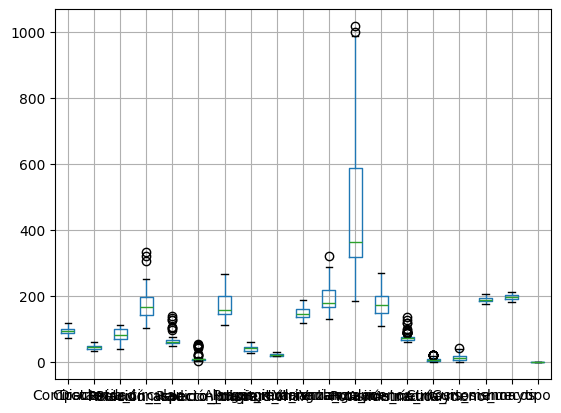

In [13]:
# Comprobamos si los datos se deben normalizar y si hay outliers
cocheRadarDF.boxplot()

Se puede apreciar que claramente hay que normalizar y que hay algunos outliers. Estos outliers van a ser eliminados ya que al ser tan pocos pueden proceder de ruido o de errores al tomar los datos. Al tratarse de tan pocos outliers, se ha decidido simplemente eliminarlos.

Normalizar el dataset es importante debido a que se debe garatinzar que las diferentes características tengan un rango uniforme para así tener un modelo estable y con un buen rendimiento. En caso de no normalizar podría ocurrir que las características de mayor rango dominen las métricas y los cálculos. Principalmente se vería afectada la métrica de distancia. Además, un dataset normalizado reduce el coste de entrenamiento en ciertos modelos y mejora su rendimiento significativamente.

In [ ]:
# Se sacan los outliers
z_scores = np.abs(stats.zscore(cocheRadarDF))
# Se considera outlier a eliminar si supera un determinado umbral
outliers = (z_scores > 3)


# Se obtienen los índices de outliers
outlier_indices = np.where(outliers.any(axis=1))[0]
print(f"Número de outliers detectados: {len(outlier_indices)}")

# Se eliminan los outliers seleccionados
cocheRadarDF = np.delete(cocheRadarDF, outlier_indices, axis=0)
cocheRadarDF = pd.DataFrame(cocheRadarDF)
tipo_dato = cocheRadarDF.iloc[:, -1]
tipo_dato.value_counts()

Número de outliers detectados: 22


,count
18,
0,613
1,211


Solo hay 22 outliers que superan el umbral establecido como fuera de lo normal. Estos outliers son eliminados ya que son pocos. Como se puede ver, la clase minoritaria no se ve muy perjudicada por esta limpieza de outliers.

<Axes: >

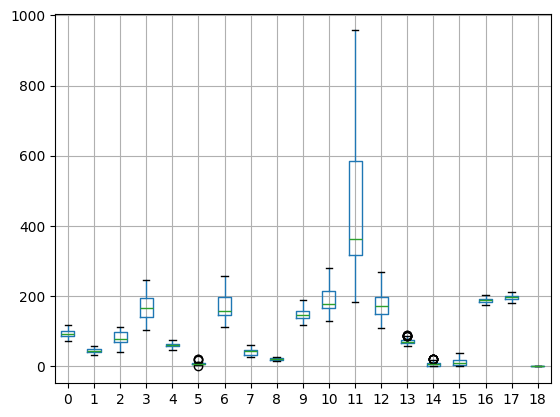

In [15]:
# Se muestra de nuevo el boxplot para ver que efectivamente se han eliminado los outliers
cocheRadarDF.boxplot()

En este nuevo diagrama, podemos observar que ya no hay tantos outliers, y los que quedan no son muy dispares.

In [16]:
# Se obtiene la correlación
correlacion = cocheRadarDF.corr()

correlacion

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.686904,0.789925,0.753394,0.218953,0.463299,0.808747,-0.784700,0.809381,0.673168,0.789502,0.815735,0.574156,-0.294756,0.218020,0.159400,0.318423,0.396095,0.257661
1,0.686904,1.000000,0.795123,0.651655,0.219576,0.537770,0.857775,-0.824824,0.856276,0.966257,0.817604,0.851153,0.934943,0.032401,0.146578,-0.013973,-0.096542,0.066716,0.073364
2,0.789925,0.795123,1.000000,0.819018,0.265067,0.626352,0.909910,-0.911090,0.899126,0.771263,0.890892,0.894810,0.701292,-0.288238,0.108874,0.267744,0.162855,0.360044,0.250286
3,0.753394,0.651655,0.819018,1.000000,0.674831,0.441381,0.803408,-0.852370,0.777422,0.586341,0.810922,0.795911,0.561797,-0.428077,0.053584,0.188405,0.433186,0.521186,0.238289
4,0.218953,0.219576,0.265067,0.674831,1.000000,0.164818,0.227200,-0.323611,0.195109,0.165760,0.248567,0.216977,0.178683,-0.316458,-0.049207,-0.028072,0.399447,0.412577,-0.007317
5,0.463299,0.537770,0.626352,0.441381,0.164818,1.000000,0.483571,-0.485399,0.482204,0.618196,0.415393,0.450326,0.400522,-0.300865,0.079103,0.140084,0.047630,0.359678,0.157515
6,0.808747,0.857775,0.909910,0.803408,0.227200,0.483571,1.000000,-0.974936,0.991773,0.810802,0.980823,0.996578,0.792838,-0.046941,0.065862,0.212965,0.026674,0.157112,0.203523
7,-0.784700,-0.824824,-0.911090,-0.852370,-0.323611,-0.485399,-0.974936,1.000000,-0.952147,-0.772548,-0.969862,-0.959813,-0.760751,0.131661,-0.047040,-0.186956,-0.130453,-0.245100,-0.204251
8,0.809381,0.856276,0.899126,0.777422,0.195109,0.482204,0.991773,-0.952147,1.000000,0.814829,0.967111,0.992066,0.790277,-0.030985,0.073304,0.215228,0.000456,0.136805,0.208839
9,0.673168,0.966257,0.771263,0.586341,0.165760,0.618196,0.810802,-0.772548,0.814829,1.000000,0.755310,0.799928,0.866587,0.010493,0.135245,0.002244,-0.093517,0.099819,0.035578


Se podría hacer una reducción de características ya que hay algunas correlaciones que superan el 0.90. No obstante, se ha decidido no hacer una reducción de características.

Aplicar una reducción de variables puede producir una perdida de información relevante, aunque las variables estén muy correlacionadas entre sí, cada una puede proporcionar información única al modelo. Además, que exista una alta correlación no implica que una variable sea redundante con respecto a otra, por lo que en ciertos casos la eliminación de una de estas variables podría ser perjudicial para el modelo.

Dado que consideramos que el dataset no presenta una dimensionalidad muy alta al tener solo 18 variables, hemos optado por no realizar la reducción de variables.







## División en conjunto Train y Test



In [17]:
X_train_cocheRadarDF, X_test_cocheRadarDF, y_train_cocheRadarDF, y_test_cocheRadarDF = train_test_split(cocheRadarDF.iloc[:, :-1], cocheRadarDF.iloc[:, -1], test_size=0.2, random_state=semilla)

A la hora de entrenar un modelo se necesitan dos conjuntos de datos, un conjunto entrenamiento para entrenar los modelos (dentro de este conjunton habrán dos subconjuntos, uno de entrenamiento y otro de validación) y un conjunto de test que será usado una vez el modelo haya sido entrenado para evaluarlo con datos que nunca haya visto.

Se ha hecho una división en Train y Test tomando un 0.2 para test. Es decir, el 80% de los datos van para Train y el 20% para Test. Este conjunto de Test será el usado en todas las pruebas de tests de los modelos. Esto se hace para que todos los modelos sean evaluados con exactamente el mismo test. Esto incluye además, que no se le van a aplicar técnicas de balanceo a este conjunto, ya que los datos artificiales del balanceo pueden influir en la comparación de los modelos, de esto modo nos aseguramos que los modelos sean evaluados con los mismos datos.

In [44]:
y_train_cocheRadarDF.value_counts() # Número de objetos de cada clase en el conjunto de train

,count
18,
0,494
1,165


In [42]:
y_test_cocheRadarDF.value_counts() # Número de objetos de cada clase en el conjunto de test

,count
18,
0,119
1,46


## Normalización



In [18]:
# Normalizamos los datos
scaler = StandardScaler()
# Ajustamos el escalador con los datos de entrenamiento y los escalamos
X_train_cocheRadarDF_escaladas = pd.DataFrame(scaler.fit_transform(X_train_cocheRadarDF), columns=X_train_cocheRadarDF.columns)
# Aplicamos la misma transformación al conjunto de test
X_test_cocheRadarDF_escaladas = pd.DataFrame(scaler.transform(X_test_cocheRadarDF), columns=X_test_cocheRadarDF.columns)

## Técnicas de desbalanceo utilizadas

Las técnicas de desbalanceo utilizadas son de oversampling. Con esto se pretende, mediante diferentes técnicas, crear datos sintéticos para compensar el desbalanceo del dataset. Se ha descartado las técnicas de undersampling debido a que vemos contraproducente reducir tanto el tamaño del dataset y muy seguramente los modelos producidos serían más precarios.

Las técnicas de oversampling utilizadas son:


*   SMOTE: Genera datos sintéticos de la clase minoritaria. Utiliza para ello la interpolación de los datos existentes de dicha clase, creando así nuevos datos (artificiales) entre las instancias cercanas.
*   Borderline-SMOTE: Similar a SMOTE, consiste en seleccionar las instancias de la clase minoritaria que están mal clasificadas, como con un modelo de clasificación k-NN. Solo genera datos sintéticos cerca de las fronteras de decisión entre las clases, es decir, en los puntos de la clase minoritaria que son más difíciles de clasificar.
*   Adaptive Synthetic Sampling (ADASYN): Genera datos sintéticos inversamente proporcionales a la densidad de los ejemplos de la clase minoritaria. Es decir, genera datos sintéticos en regiones del espacio de características donde la densidad de ejemplos minoritarios es baja, y menos o ninguno donde la densidad es alta.
*   Borderline-SMOTE SVM: Es una alternativa a Borderline-SMOTE, pero en lugar de usar k-NN utiliza SVM. La SVM se utiliza en este caso para localizar el límite de decisión definido por los vectores de soporte y los ejemplos de la clase minoritaria que se acercan a los vectores de soporte se convierten en el foco para generar datos sintéticos.

Una vez obtenidos todos los modelos con estas técnicas, se hará una comparación y un análisis de resultados para saber cual sería la mejor técnica y cual la peor.



## Modelos de validación utilizados

Al tratarse de un modelo de clasificación se utilizarán modelos de validación basados en clasificación. Se va a intentar obtener el mejor modelo comparando diferentes modelos de validación, por ello se han utilizado modelos que funcionan de forma diferente.
Los modelos de validación utilizados junto con sus hiperparámetros son:


*   SVM: Se fundamenta en encontrar una frontera de decisión que separe las diferentes clases en los datos de manera óptima.
*   Árbol de decisión: Los árboles de decisión son un método de aprendizaje supervisado no paramétrico que se utiliza para la clasificación y la regresión. El objetivo es crear un modelo que prediga el valor de una variable objetivo mediante el aprendizaje de reglas de decisión sencillas inferidas a partir de las características de los datos.
*   Perceptrón multicapa: Es un tipo de red neuronal en la que existe una capa de entrada, una serie de capas ocultas y una capa de salida. La capa de entrada puede estar compuesta por varias entradas. Asimismo, la capa de salida puede estar compuesta por varias salidas. En la capaoculta las neuronas devuelven el valor de una determinada función de activación para el valor de la entrada de la neurona. De ahora en adelante nos referiremos al perceptrón multicapa como red neuronal.
*   K-Vecinos o KNN: KNN usa la proximidad para comparar un punto de datos con un set de datos con el que se entrenó y el cual memorizó para realizar predicciones. Funciona sobre la suposición de que los puntos similares pueden encontrarse cerca unos de otros.



## Métricas utilizadas

Estamos ante un problema de clasificación, por tanto debemos de utilizar métricas de clasificación. Estas métricas se basan en la clasificación que hace el modelo con respecto a la clase real.
Las métricas utilizadas son las siguientes:


*   Accuracy: Indica las predicciones correctas sobre el total de predicciones. Accuracy= PrediccionesCorrectas/TotalPredicciones.
*   F1-Score: Es la media armónica entre Recall y Precision. F1-Score=2*(Precision*Recall)/(Precision+Recall).
*   Precision: Indica la proporción de las predicciones positivas que realmente son positivas. Precision=VerdaderosPositivos/(VerdaderosPositivos+FalsosPositivos)
*   Recall: Indica la proporción de las predicciones positivas que se han detectado correctamente. Recall=VerdaderosPositivos/(VerdaderosPositivos+FalsosNegativos)

Hay que tener en cuenta que Accuracy no es una métrica fiable en los problemas de desbalanceo. Esto se debe a que no tiene en cuenta la distribución de las clases y podría ignorar la clase minoritaria obteniendo aún así un alto resultado. En su lugar se va a utilizar F1-Score, ya que al tratarse de la media armónica de Recall y Precision, ofrecerá una evaluación más equilibrada.

Por último, se va a utilizar una matriz de confusión para mostrar visualmente los resultados de test, una matriz de confusión esta formada por:
- Verdaderos positivos: aparecen en la primera fila y primera columna de la matriz, e indican las muestras que se clasifican como positivas y que realmente lo son para dicha etiqueta.
- Falsos positivos: aparecen en la primera fila y segunda columna de la matriz, e indican las muestras que se clasifican como positivas pero que en realidad son negativas para dicha etiqueta.
- Falsos negativos: aparecen en la segunda fila y primera columna de la matriz, e indican las muestras que se clasifican como negativas pero que en realidad son positivas para dicha etiqueta.
- Verdaderos negativos: aparecen en la segunda fila y segunda columna de la matriz, e indican las muestras que se clasifican como negativas y que realmente lo son para dicha etiqueta.



## Validación cruzada

Cabe mencionar que se va a utilizar validación cruzada estratificada. Esto se va a hacer debido a que al tratarse de una problema de desbalanceo es importante mantener una distribución de las clases en cada fold, es decir, nos aseguramos que haya presencia de ambas clases en cada fold de forma uniforme. El parámetro shuffle nos permite barajar los datos antes de dividirlos y por tanto tratar de evitar que estén sesgados. Se utilizan 5 folds.

NOTA: A la hora de entrenar los diferentes modelos, se han utilizado diferentes grids de hiperparámetros. Esto se ha hecho debido a que para cada modelo unos hiperparámetros dan mejores resultados que otros. En un principio se intentó realizar los entrenamientos con grandes grids de hiperparámetros, pero esto hacía que los entrenamientos tardaran mucho tiempo y al final los resultados no eran muy buenos ya que tendían al overfitting. Por tanto, se ha tomado la estrategia de usar grids pequeños cambiando los valores intentando evitar los que produzcan overfitting e intentando introducir los que den mejores resultados.

Además, para no tener que entrenar todos los modelos de nuevo, se ha creado un if en cada celda de modelo para que si el modelo ya se encuentra en la carpeta de modelos no haga falta entrenarlo, y de esta manera se pueda utilizar el modelo directamente. Si se desea realizar el entrenamiento, simplemente hay que eliminar el modelo de la carpeta de modelos.

## Modelos antes de balancear

Se van a entrenar los modelos del dataset actual, sin ninguna técnica de balanceo, para ver los resultados que daría el modelo sin aplicar ninguna técnica de balanceo. Posteriormente, estos resultados nos serán útiles para compararlos con los de los modelos balanceados. Además, nos ayudará a analizar la cuestión: _¿Es posible tratar un problema de desbalanceo con técnicas que no tienen en cuenta el desbalanceo?_



### SVM



In [111]:
if not os.path.exists(ruta_modelos+'/modelo_SVM_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_SVM_CR = {
      'C': [0.1, 1, 10, 100, 300],  # Regularización
      'loss': ['hinge', 'squared_hinge'],  # Función de pérdida
      'max_iter': [1000, 5000, 10000, 50000]  # Número máximo de iteraciones
  }

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla) # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_SVM_CR = GridSearchCV(estimator=LinearSVC(random_state=semilla),param_grid=param_grid_SVM_CR,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_SVM_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_SVM_CR, ruta_modelos+'/modelo_SVM_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_SVM_CR.best_params_)
else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_SVM_CR = joblib.load(ruta_modelos+'/modelo_SVM_CR.pkl')

In [36]:
# Realizar las predicciones
y_pred_train = modelo_SVM_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_SVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

In [37]:
# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

F1 Train: 0.5878378378378378
F1 Test: 0.5909090909090909
Accuracy: 0.7818181818181819
Precision: 0.6190476190476191
Recall: 0.5652173913043478


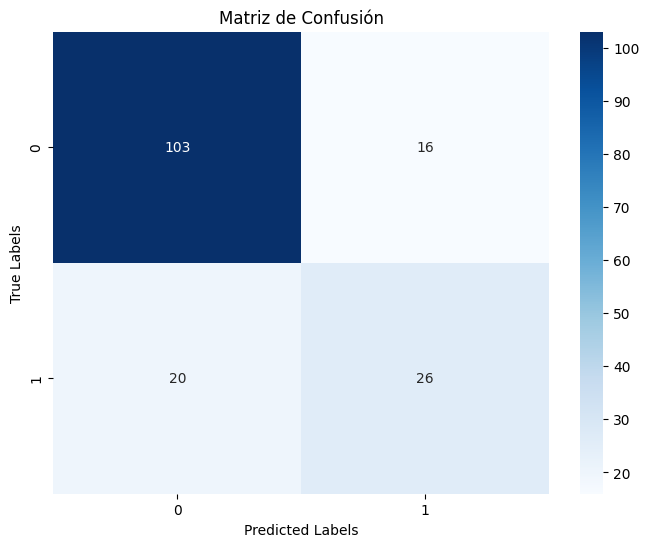

In [38]:
# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'C': 1, 'loss': 'squared_hinge', 'max_iter': 1000}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.58 y el F1-score de test es de 0.59. Se ha obtenido 0.78 de Accuracy, 0.61 de Precision y 0.56 de Recall. Observando el F1-score, podemos ver que el modelo no funciona muy bien, los resultados son bastante bajos. Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 103 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 26 vehículos de tipo "coche".
*   Se han detectado 20 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 16 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".



### Árbol de decisión



F1 Train: 0.6201550387596899
F1 Test: 0.5333333333333333
Accuracy: 0.7878787878787878
Precision: 0.6896551724137931
Recall: 0.43478260869565216


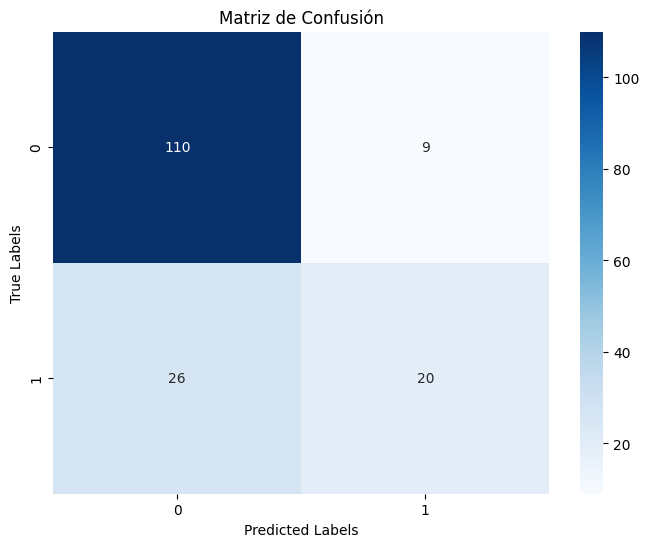

In [46]:
if not os.path.exists(ruta_modelos+'/modelo_AD_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_AD = {
      'max_depth': [2,3,4,5], # Profundidad máxima
      "min_samples_split": [2, 3, 4], # Muestras mínimas para dividir un nodo
      "min_samples_leaf": [2, 3, 4], # Muestras mínimas que debe tener el nodo hoja
      'criterion': ['gini']  # Criterio
  }

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_AD_CR = GridSearchCV(estimator=DecisionTreeClassifier(random_state=semilla),param_grid=param_grid_AD,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_AD_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_AD_CR, ruta_modelos+'/modelo_AD_CR.pkl')

  # Mostrar los mejores hiperparámetros
  print("Mejores hiperparámetros:", modelo_AD_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_AD_CR = joblib.load(ruta_modelos+'/modelo_AD_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_AD_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_AD_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2}

Como se puede apreciar hay aglo de overfitting, pero no es demasiado alto, el F1-score del train es de 0.62 y el F1-score de test es de 0.53. Se ha obtenido 0.78 de Accuracy, 0.68 de Precision y 0.43 de Recall. Observando el F1-score, podemos ver que el modelo no funciona muy bien, los resultados son bastante bajos. Detecta bastante bien "otros" pero peor "coche". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 110 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 20 vehículos de tipo "coche".
*   Se han detectado 26 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 9 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

### Red Neuronal



F1 Train: 0.8273809523809523
F1 Test: 0.7096774193548387
Accuracy: 0.8363636363636363
Precision: 0.7021276595744681
Recall: 0.717391304347826


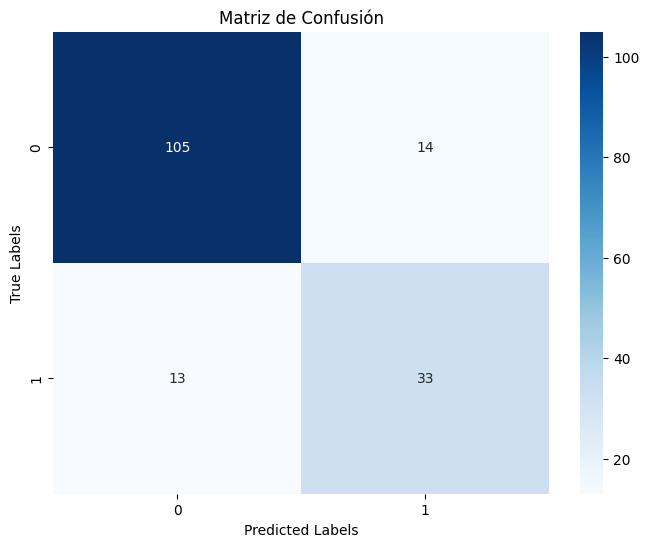

In [50]:
if not os.path.exists(ruta_modelos+'/modelo_RN_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_RN = {
      'hidden_layer_sizes': [128],  # Capa oculta
      'activation': ['logistic', 'relu'],  # Función de activación
      'solver': ['lbfgs','adam'],  # Método de optimización
      'max_iter': [25]  # Número máximo de iteraciones
  }

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_RN_CR = GridSearchCV(estimator=MLPClassifier(random_state=semilla),param_grid=param_grid_RN,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_RN_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_RN_CR, ruta_modelos+'/modelo_RN_CR.pkl')

  # Mostrar los mejores hiperparámetros
  print("Mejores hiperparámetros:", modelo_RN_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_RN_CR = joblib.load(ruta_modelos+'/modelo_RN_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_RN_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_RN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'activation': 'relu', 'hidden_layer_sizes': 128, 'max_iter': 25, 'solver': 'lbfgs'}

Como se puede apreciar hay algo overfitting, estaría en el limite de considerarse en cierto modo alto, el F1-score del train es de 0.82 y el F1-score de test es de 0.70. Se ha obtenido 0.83 de Accuracy, 0.70 de Precision y 0.71 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien de no ser por el overfitting. Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 105 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 33 vehículos de tipo "coche".
*   Se han detectado 13 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 14 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

### K\-Vecinos



F1 Train: 0.6890243902439024
F1 Test: 0.5591397849462365
Accuracy: 0.7515151515151515
Precision: 0.5531914893617021
Recall: 0.5652173913043478


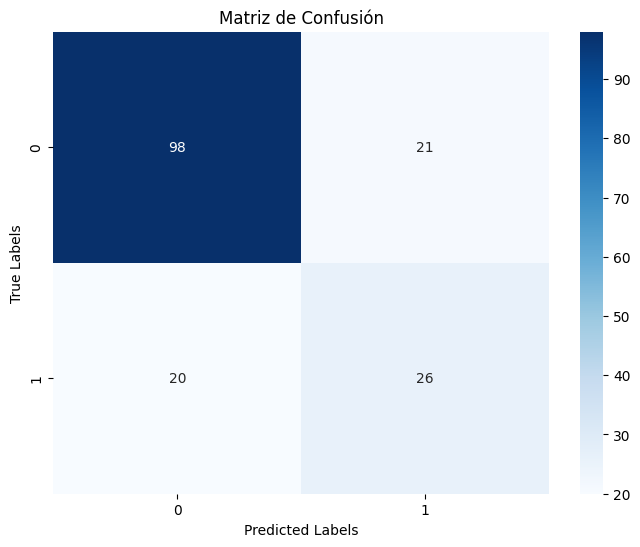

In [55]:
if not os.path.exists(ruta_modelos+'/modelo_KNN_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_knn = {
      'n_neighbors': [3, 5, 7, 9, 11, 15],  # Número de vecinos
      'weights': ['uniform', 'distance'],    # Ponderación de los vecinos
      'metric': ['euclidean', 'minkowski']  # Métrica de distancia
  }

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_KNN_CR = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid_knn,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_KNN_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_KNN_CR, ruta_modelos+'/modelo_KNN_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_KNN_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_KNN_CR = joblib.load(ruta_modelos+'/modelo_KNN_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_KNN_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_KNN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

Como se puede apreciar hay algo overfitting, estaría en el limite de considerarse en cierto modo alto, el F1-score del train es de 0.68 y el F1-score de test es de 0.59. Se ha obtenido 0.75 de Accuracy, 0.55 de Precision y 0.56 de Recall. Observando el F1-score, podemos ver que el modelo no funciona muy bien y parece presentar overfitting. Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 98 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 26 vehículos de tipo "coche".
*   Se han detectado 20 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 21 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

## Modelos después de balancear



### SMOTE



##### SMOTE: SVM



F1 Train: 0.6837209302325581
F1 Test: 0.6837606837606838
Accuracy: 0.7757575757575758
Precision: 0.5633802816901409
Recall: 0.8695652173913043


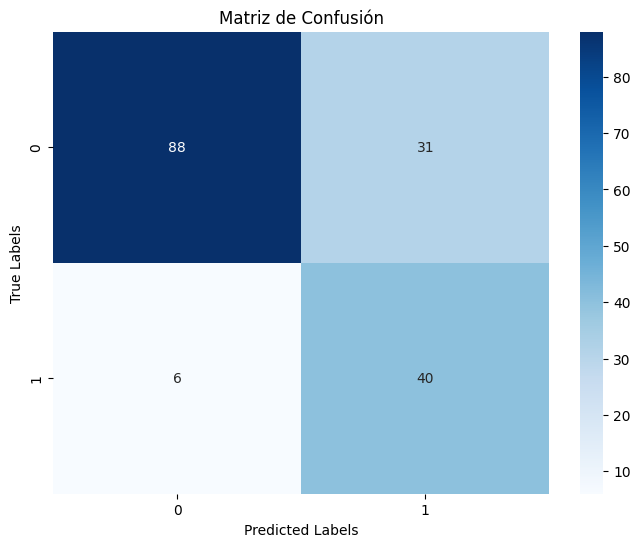

In [60]:
if not os.path.exists(ruta_modelos+'/modelo_SVM_SMOTE_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_SVM_CR = {
      'classifier__C': [0.1,1,10,50,100,200],  # Regularización
      'classifier__loss': ['hinge', 'squared_hinge'],  # Función de pérdida
      'classifier__max_iter': [1000, 5000, 10000, 50000]  # Número máximo de iteraciones
  }

  # Configurar SMOTE
  smote = SMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('smote', smote),             # Aplicación de SMOTE
      ('classifier', LinearSVC(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_SVM_SMOTE_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_SVM_CR,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_SVM_SMOTE_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_SVM_SMOTE_CR, ruta_modelos+'/modelo_SVM_SMOTE_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_SVM_SMOTE_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_SVM_SMOTE_CR = joblib.load(ruta_modelos+'/modelo_SVM_SMOTE_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_SVM_SMOTE_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_SVM_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__C': 100, 'classifier__loss': 'hinge', 'classifier__max_iter': 5000}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.68 y el F1-score de test es de 0.68. Se ha obtenido 0.75 de Accuracy, 0.56 de Precision y 0.86 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, aunque se puede ver claramente que detecta mucho mejor "coche" y mucho peor "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 88 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 40 vehículos de tipo "coche".
*   Se han detectado 6 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 31 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### SMOTE: Árbol de decisión



F1 Train: 0.649164677804296
F1 Test: 0.6101694915254238
Accuracy: 0.7212121212121212
Precision: 0.5
Recall: 0.782608695652174


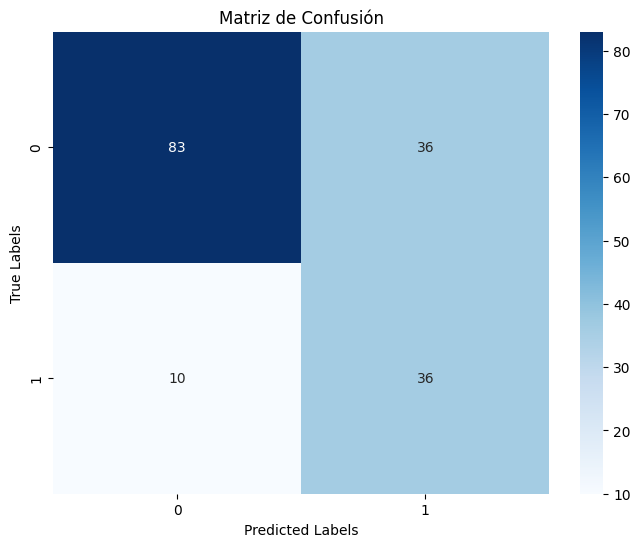

In [67]:
if not os.path.exists(ruta_modelos+'/modelo_AD_SMOTE_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_AD = {
      'classifier__criterion': ['gini', 'entropy'],  # Criterio
      'classifier__max_depth': [2,3,4,5,10],  # Profundidad máxima
      'classifier__min_samples_split': [2, 5,6,7, 10],  # Muestras mínimas para dividir un nodo
      'classifier__min_samples_leaf': [1, 2, 5,6,7, 10]  # Muestras mínimas que debe tener el nodo hoja
  }

  # Configurar SMOTE
  smote = SMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('smote', smote),             # Aplicación de SMOTE
      ('classifier', DecisionTreeClassifier(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_AD_SMOTE_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_AD,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_AD_SMOTE_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_AD_SMOTE_CR, ruta_modelos+'/modelo_AD_SMOTE_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_AD_SMOTE_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_AD_SMOTE_CR = joblib.load(ruta_modelos+'/modelo_AD_SMOTE_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_AD_SMOTE_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_AD_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 4, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}

Como se puede apreciar no hay casi overfitting, el F1-score del train es de 0.64 y el F1-score de test es de 0.61. Se ha obtenido 0.72 de Accuracy, 0.5 de Precision y 0.78 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, aunque se puede ver claramente que detecta mucho mejor "coche" y mucho peor "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 83 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 36 vehículos de tipo "coche".
*   Se han detectado 10 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 36 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### SMOTE: Red neuronal



F1 Train: 0.8355795148247979
F1 Test: 0.7326732673267327
Accuracy: 0.8363636363636363
Precision: 0.6727272727272727
Recall: 0.8043478260869565


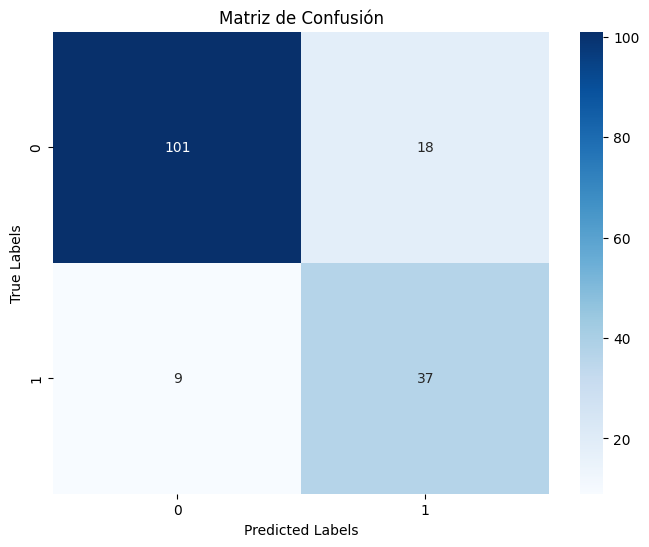

In [69]:
if not os.path.exists(ruta_modelos+'/modelo_RN_SMOTE_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_RN = {
      'classifier__hidden_layer_sizes': [128],  # Diferentes configuraciones de capas ocultas
      'classifier__activation': ['relu'],  # Funciones de activación
      'classifier__solver': ['lbfgs', 'adam'],  # Métodos de optimización
      'classifier__max_iter': [170]  # Número máximo de iteraciones
  }

  # Configurar SMOTE
  smote = SMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('smote', smote),             # Aplicación de SMOTE
      ('classifier', MLPClassifier(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_RN_SMOTE_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_RN,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_RN_SMOTE_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_RN_SMOTE_CR, ruta_modelos+'/modelo_RN_SMOTE_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_RN_SMOTE_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_RN_SMOTE_CR = joblib.load(ruta_modelos+'/modelo_RN_SMOTE_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_RN_SMOTE_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_RN_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__activation': 'relu', 'classifier__hidden_layer_sizes': 128, 'classifier__max_iter': 170, 'classifier__solver': 'adam'}

Como se puede apreciar hay algo de overfitting, está en el límite de considerarse alto, el F1-score del train es de 0.83 y el F1-score de test es de 0.73. Se ha obtenido 0.83 de Accuracy, 0.67 de Precision y 0.80 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien de no ser por el overfitting. Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 101 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 37 vehículos de tipo "coche".
*   Se han detectado 9 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 18 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### SMOTE: K\-Vecinos



F1 Train: 0.6542443064182195
F1 Test: 0.625
Accuracy: 0.7090909090909091
Precision: 0.4878048780487805
Recall: 0.8695652173913043


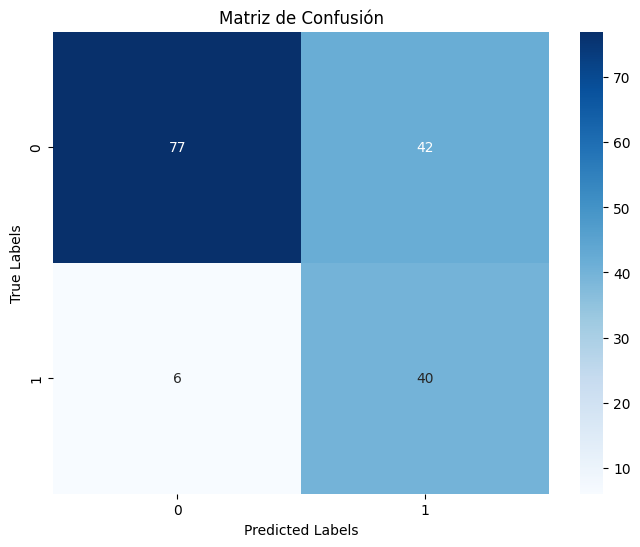

In [72]:
if not os.path.exists(ruta_modelos+'/modelo_KNN_SMOTE_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_knn = {
      'classifier__n_neighbors': [3, 5, 7, 9, 11,13, 15],  # Número de vecinos
      'classifier__weights': ['uniform', 'distance'],    # Ponderación de los vecinos
      'classifier__metric': ['euclidean', 'minkowski']  # Métrica de distancia
  }

  # Configurar SMOTE
  smote = SMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('smote', smote),             # Aplicación de SMOTE
      ('classifier', KNeighborsClassifier())  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_KNN_SMOTE_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_knn,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_KNN_SMOTE_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_KNN_SMOTE_CR, ruta_modelos+'/modelo_KNN_SMOTE_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_KNN_SMOTE_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_KNN_SMOTE_CR = joblib.load(ruta_modelos+'/modelo_KNN_SMOTE_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_KNN_SMOTE_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_KNN_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 15, 'classifier__weights': 'uniform'}

Como se puede apreciar hay algo de overfitting, pero muy poco, el F1-score del train es de 0.65 y el F1-score de test es de 0.62. Se ha obtenido 0.70 de Accuracy, 0.48 de Precision y 0.86 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" pero bastante mal "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 77 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 40 vehículos de tipo "coche".
*   Se han detectado 6 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 42 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

### Borderline\-SMOTE



##### Borderline\-SMOTE: SVM



F1 Train: 0.6773455377574371
F1 Test: 0.6890756302521008
Accuracy: 0.7757575757575758
Precision: 0.5616438356164384
Recall: 0.8913043478260869


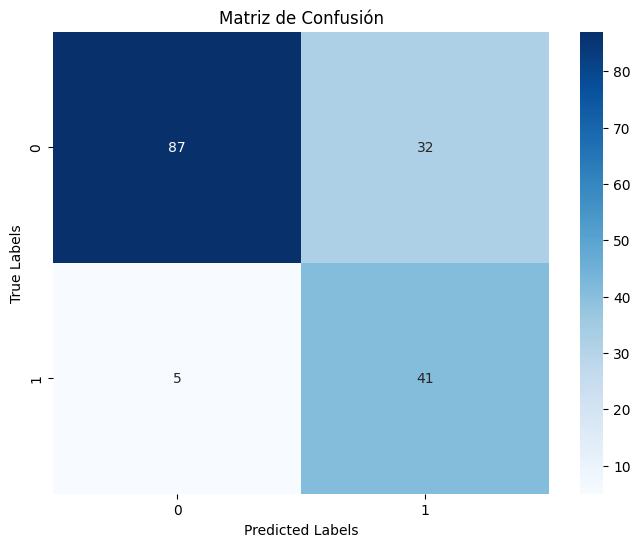

In [75]:
if not os.path.exists(ruta_modelos+'/modelo_SVM_B_SMOTE_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_SVM_CR = {
      'classifier__C': [0.1, 1, 10, 100, 300],  # Regularización
      'classifier__loss': ['hinge', 'squared_hinge'] # Función de pérdida
  }

  # Configurar SMOTE
  borderlineSmote = BorderlineSMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('borderlineSmote', borderlineSmote),             # Aplicación de SMOTE
      ('classifier', LinearSVC(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_SVM_B_SMOTE_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_SVM_CR,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_SVM_B_SMOTE_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_SVM_B_SMOTE_CR, ruta_modelos+'/modelo_SVM_B_SMOTE_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_SVM_B_SMOTE_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_SVM_B_SMOTE_CR = joblib.load(ruta_modelos+'/modelo_SVM_B_SMOTE_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_SVM_B_SMOTE_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_SVM_B_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__C': 10, 'classifier__loss': 'hinge'}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.67 y el F1-score de test es de 0.68. Se ha obtenido 0.77 de Accuracy, 0.56 de Precision y 0.89 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" pero bastante mal "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 87 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 41 vehículos de tipo "coche".
*   Se han detectado 5 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 32 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### Borderline\-SMOTE: Árbol de decisión



F1 Train: 0.6860986547085202
F1 Test: 0.704
Accuracy: 0.7757575757575758
Precision: 0.5569620253164557
Recall: 0.9565217391304348


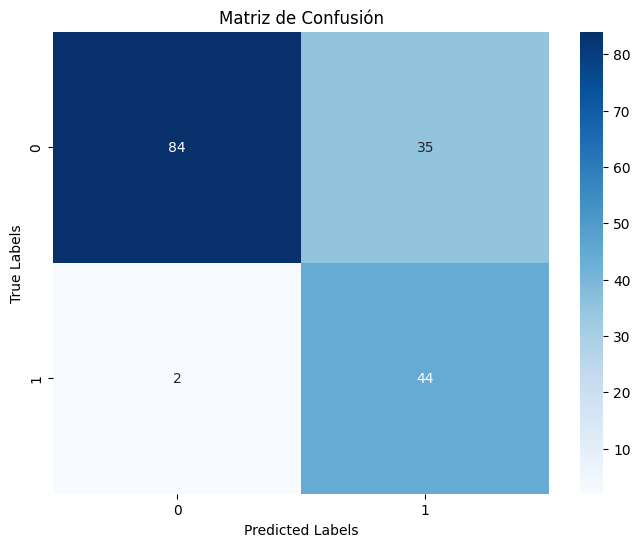

In [78]:
if not os.path.exists(ruta_modelos+'/modelo_AD_B_SMOTE_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_AD = {
      'classifier__criterion': ['gini', 'entropy'],  # Criterio
      'classifier__max_depth': [5],  # Profundidad máxima
      'classifier__min_samples_split': [2,3, 5, 10],  # Muestras mínimas para dividir un nodo
      'classifier__min_samples_leaf': [1, 2, 3,5, 10]  # Muestras mínimas que debe tener el nodo hoja
  }

  # Configurar borderline-SMOTE
  borderlineSmote = BorderlineSMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('borderlineSmote', borderlineSmote),             # Aplicación de borderline-SMOTE
      ('classifier', DecisionTreeClassifier(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_AD_B_SMOTE_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_AD,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_AD_B_SMOTE_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_AD_B_SMOTE_CR, ruta_modelos+'/modelo_AD_B_SMOTE_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_AD_B_SMOTE_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_AD_B_SMOTE_CR = joblib.load(ruta_modelos+'/modelo_AD_B_SMOTE_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_AD_B_SMOTE_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_AD_B_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5, 'classifier__min_samples_leaf': 3, 'classifier__min_samples_split': 10}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.68 y el F1-score de test es de 0.70. Se ha obtenido 0.77 de Accuracy, 0.55 de Precision y 0.95 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" pero bastante mal "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 84 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 44 vehículos de tipo "coche".
*   Se han detectado 2 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 35 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### Borderline\-SMOTE: Red neuronal



F1 Train: 0.7412935323383084
F1 Test: 0.7102803738317757
Accuracy: 0.8121212121212121
Precision: 0.6229508196721312
Recall: 0.8260869565217391


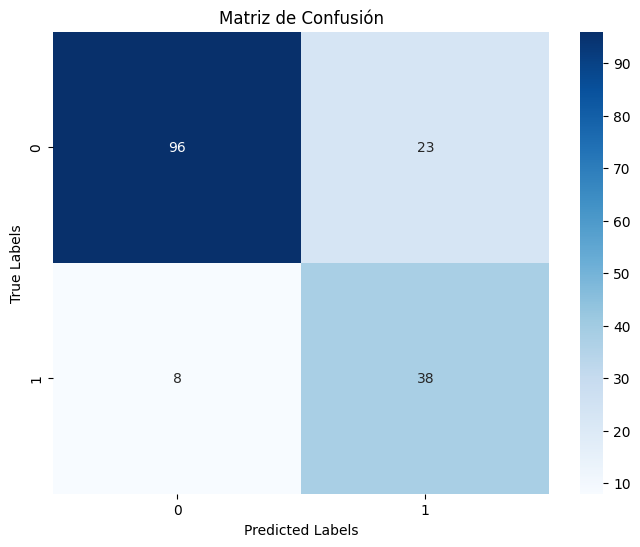

In [82]:
if not os.path.exists(ruta_modelos+'/modelo_RN_B_SMOTE_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_RN = {
      'classifier__hidden_layer_sizes': [512],  # Capa oculta
      'classifier__activation': ['logistic'],  # Función de activación
      'classifier__solver': ['lbfgs'],  # Método de optimización
      'classifier__max_iter': [100]  # Número máximo de iteraciones
  }

  # Configurar borderline-SMOTE
  borderlineSmote = BorderlineSMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('borderlineSmote', borderlineSmote),             # Aplicación de borderline-SMOTE
      ('classifier', MLPClassifier(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_RN_B_SMOTE_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_RN,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_RN_B_SMOTE_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_RN_B_SMOTE_CR, ruta_modelos+'/modelo_RN_B_SMOTE_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_RN_B_SMOTE_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_RN_B_SMOTE_CR = joblib.load(ruta_modelos+'/modelo_RN_B_SMOTE_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_RN_B_SMOTE_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_RN_B_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__activation': 'logistic', 'classifier__hidden_layer_sizes': 512, 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs'}

Como se puede apreciar no hay prácticamente overfitting, es muy poco, el F1-score del train es de 0.74 y el F1-score de test es de 0.71. Se ha obtenido 0.81 de Accuracy, 0.62 de Precision y 0.82 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" y bastante bien "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 96 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 38 vehículos de tipo "coche".
*   Se han detectado 8 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 23 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### Borderline\-SMOTE: K\-Vecinos



F1 Train: 0.6597938144329897
F1 Test: 0.6031746031746031
Accuracy: 0.696969696969697
Precision: 0.475
Recall: 0.8260869565217391


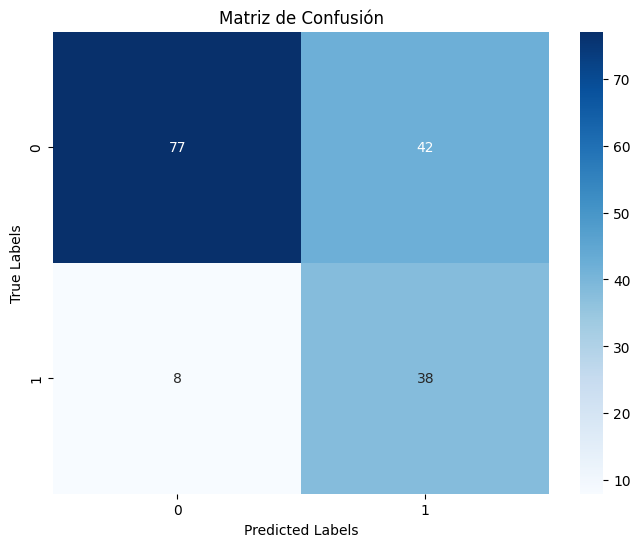

In [86]:
if not os.path.exists(ruta_modelos+'/modelo_KNN_B_SMOTE_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_knn = {
      'classifier__n_neighbors': [6, 7, 9, 11,12, 15],  # Número de vecinos
      'classifier__weights': ['uniform', 'distance'],    # Ponderación de los vecinos
      'classifier__metric': ['euclidean', 'minkowski']  # Métrica de distancia
  }

  # Configurar borderline-SMOTE
  borderlineSmote = BorderlineSMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('borderlineSmote', borderlineSmote),             # Aplicación de borderline-SMOTE
      ('classifier', KNeighborsClassifier())  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_KNN_B_SMOTE_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_knn,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_KNN_B_SMOTE_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_KNN_B_SMOTE_CR, ruta_modelos+'/modelo_KNN_B_SMOTE_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_KNN_B_SMOTE_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_KNN_B_SMOTE_CR = joblib.load(ruta_modelos+'/modelo_KNN_B_SMOTE_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_KNN_B_SMOTE_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_KNN_B_SMOTE_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))
# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}

Como se puede apreciar no hay mucho overfitting, es relativamente bajo, el F1-score del train es de 0.65 y el F1-score de test es de 0.60. Se ha obtenido 0.69 de Accuracy, 0.47 de Precision y 0.82 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" pero bastante mal "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 77 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 38 vehículos de tipo "coche".
*   Se han detectado 8 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 42 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

### ADASYN



##### ADASYN: SVM



F1 Train: 0.6742596810933941
F1 Test: 0.6949152542372882
Accuracy: 0.7818181818181819
Precision: 0.5694444444444444
Recall: 0.8913043478260869


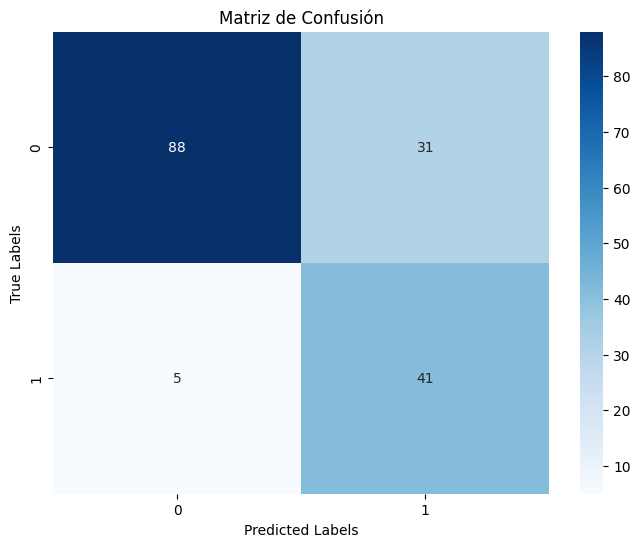

In [89]:
if not os.path.exists(ruta_modelos+'/modelo_SVM_ADASYN_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_SVM_CR = {
      'classifier__C': [0.1, 1, 10, 100, 300],  # Regularización
      'classifier__loss': ['hinge', 'squared_hinge'] # Función de pérdida
  }

  # Configurar ADASYN
  adasyn = ADASYN(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('adasyn', adasyn),             # Aplicación de ADASYN
      ('classifier', LinearSVC(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_SVM_ADASYN_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_SVM_CR,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_SVM_ADASYN_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_SVM_ADASYN_CR, ruta_modelos+'/modelo_SVM_ADASYN_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_SVM_ADASYN_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_SVM_ADASYN_CR = joblib.load(ruta_modelos+'/modelo_SVM_ADASYN_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_SVM_ADASYN_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_SVM_ADASYN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)


# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__C': 10, 'classifier__loss': 'hinge'}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.67 y el F1-score de test es de 0.69. Se ha obtenido 0.78 de Accuracy, 0.56 de Precision y 0.89 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" pero no tan bien "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 88 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 41 vehículos de tipo "coche".
*   Se han detectado 5 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 31 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### ADASYN: Árbol de decisión



F1 Train: 0.6908315565031983
F1 Test: 0.6015037593984962
Accuracy: 0.6787878787878788
Precision: 0.45977011494252873
Recall: 0.8695652173913043


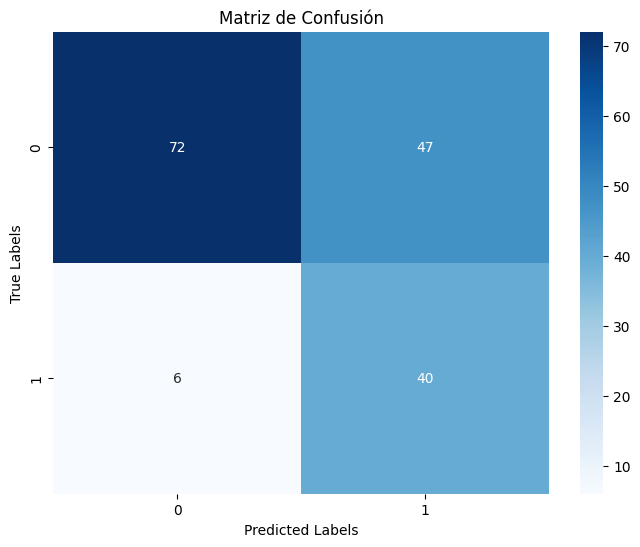

In [92]:
if not os.path.exists(ruta_modelos+'/modelo_AD_ADASYN_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_AD = {
      'classifier__criterion': ['gini', 'entropy'],  # Criterio
      'classifier__max_depth': [5]  # Profundidad máxima
  }

  # Configurar ADASYN
  adasyn = ADASYN(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('adasyn', adasyn),             # Aplicación de ADASYN
      ('classifier', DecisionTreeClassifier(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_AD_ADASYN_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_AD,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_AD_ADASYN_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_AD_ADASYN_CR, ruta_modelos+'/modelo_AD_ADASYN_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_AD_ADASYN_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_AD_ADASYN_CR = joblib.load(ruta_modelos+'/modelo_AD_ADASYN_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_AD_ADASYN_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_AD_ADASYN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__criterion': 'entropy', 'classifier__max_depth': 5}

Como se puede apreciar hay algo de overfitting, vuelve a estar en el límite, el F1-score del train es de 0.69 y el F1-score de test es de 0.60. Se ha obtenido 0.67 de Accuracy, 0.45 de Precision y 0.86 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" pero bastante mal "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 72 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 47 vehículos de tipo "coche".
*   Se han detectado 6 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 47 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### ADASYN: Red neuronal



F1 Train: 0.6713947990543735
F1 Test: 0.7027027027027027
Accuracy: 0.8
Precision: 0.6
Recall: 0.8478260869565217


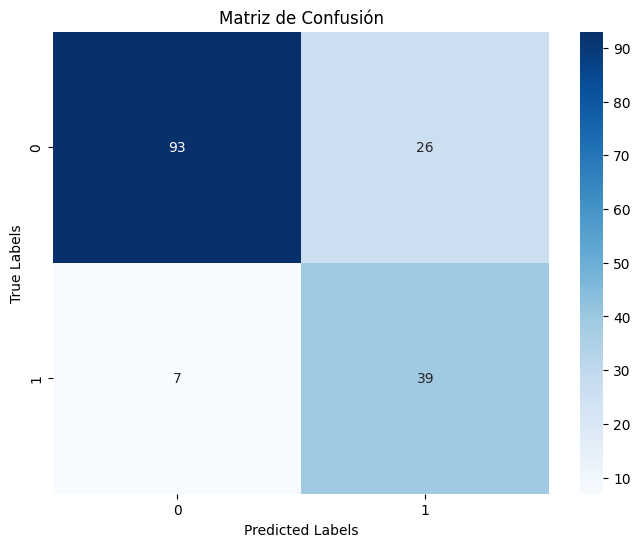

In [95]:
if not os.path.exists(ruta_modelos+'/modelo_RN_ADASYN_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_RN = {
      'classifier__hidden_layer_sizes': [1024],  # Capa oculta
      'classifier__activation': ['logistic'],  # Función de activación
      'classifier__solver': ['lbfgs'],  # Método de optimización
      'classifier__max_iter': [100]  # Número máximo de iteraciones
  }

  # Configurar ADASYN
  adasyn = ADASYN(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('adasyn', adasyn),             # Aplicación de ADASYN
      ('classifier', MLPClassifier(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_RN_ADASYN_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_RN,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_RN_ADASYN_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_RN_ADASYN_CR, ruta_modelos+'/modelo_RN_ADASYN_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_RN_ADASYN_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_RN_ADASYN_CR = joblib.load(ruta_modelos+'/modelo_RN_ADASYN_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_RN_ADASYN_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_RN_ADASYN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__activation': 'logistic', 'classifier__hidden_layer_sizes': 1024, 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs'}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.67 y el F1-score de test es de 0.70. Se ha obtenido 0.8 de Accuracy, 0.6 de Precision y 0.84 de Recall. Observando el F1-score, podemos ver que el modelo funciona bastante bien, detecta muy bien "coche" y "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 93 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 39 vehículos de tipo "coche".
*   Se han detectado 7 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 26 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### ADASYN: K\-Vecinos



F1 Train: 0.6570841889117043
F1 Test: 0.65625
Accuracy: 0.7333333333333333
Precision: 0.5121951219512195
Recall: 0.9130434782608695


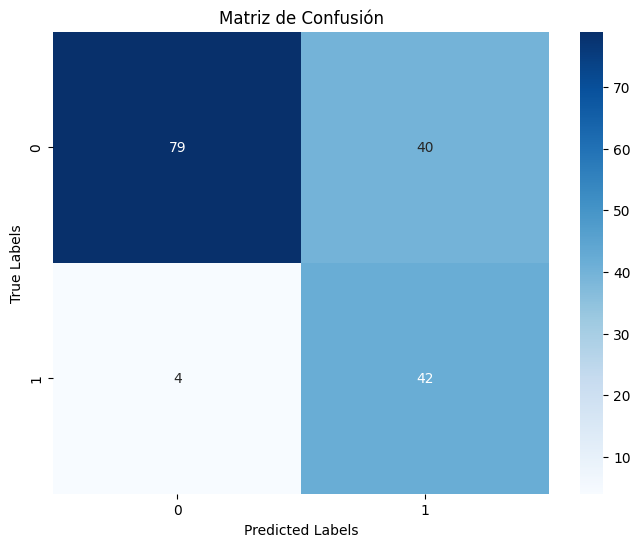

In [98]:
if not os.path.exists(ruta_modelos+'/modelo_KNN_ADASYN_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_knn = {
      'classifier__n_neighbors': [3, 9, 11,12,14],  # Número de vecinos
      'classifier__weights': ['uniform', 'distance'],    # Ponderación de los vecinos
      'classifier__metric': ['euclidean', 'minkowski']  # Métrica de distancia
  }

  # Configurar ADASYN
  adasyn = ADASYN(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('adasyn', adasyn),             # Aplicación de ADASYN
      ('classifier', KNeighborsClassifier())  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_KNN_ADASYN_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_knn,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_KNN_ADASYN_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_KNN_ADASYN_CR, ruta_modelos+'/modelo_KNN_ADASYN_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_KNN_ADASYN_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_KNN_ADASYN_CR = joblib.load(ruta_modelos+'/modelo_KNN_ADASYN_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_KNN_ADASYN_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_KNN_ADASYN_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.65 y el F1-score de test es de 0.65. Se ha obtenido 0.73 de Accuracy, 0.51 de Precision y 0.91 de Recall. Observando el F1-score, podemos ver que el modelo funciona más o menos bien, detecta muy bien "coche" pero bastante mal "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 79 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 42 vehículos de tipo "coche".
*   Se han detectado 4 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 40 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

### Borderline\-SMOTE SVM



#### Borderline\-SMOTE SVM: SVM



F1 Train: 0.6697892271662763
F1 Test: 0.6837606837606838
Accuracy: 0.7757575757575758
Precision: 0.5633802816901409
Recall: 0.8695652173913043


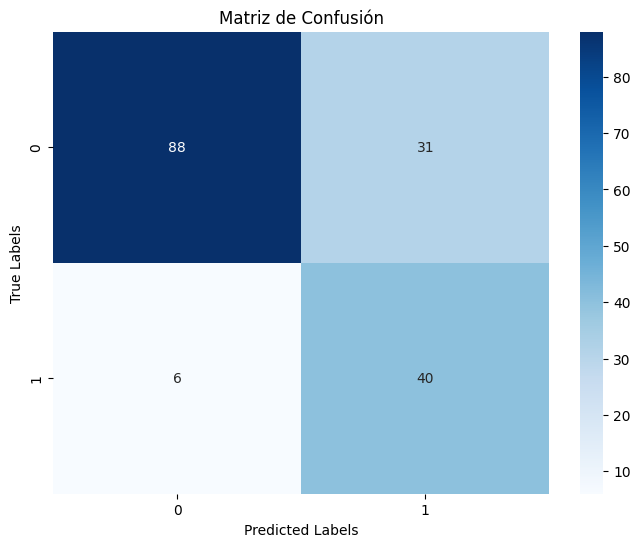

In [101]:
if not os.path.exists(ruta_modelos+'/modelo_SVM_SMOTESVM_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_SVM_CR = {
      'classifier__C': [0.1, 1, 10, 100, 300],  # Regularización
      'classifier__loss': ['hinge', 'squared_hinge'] # Función de pérdida
  }

  # Configurar SVMSMOTE
  svmSmote = SVMSMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('svmSmote', svmSmote),             # Aplicación de SVMSMOTE
      ('classifier', LinearSVC(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_SVM_SMOTESVM_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_SVM_CR,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_SVM_SMOTESVM_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_SVM_SMOTESVM_CR, ruta_modelos+'/modelo_SVM_SMOTESVM_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_SVM_SMOTESVM_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_SVM_SMOTESVM_CR = joblib.load(ruta_modelos+'/modelo_SVM_SMOTESVM_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_SVM_SMOTESVM_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_SVM_SMOTESVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__C': 10, 'classifier__loss': 'hinge'}

Como se puede apreciar no hay casi nada de overfitting, el F1-score del train es de 0.66 y el F1-score de test es de 0.68. Se ha obtenido 0.77 de Accuracy, 0.56 de Precision y 0.86 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" y más o menos bien "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 88 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 40 vehículos de tipo "coche".
*   Se han detectado 6 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 31 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### Borderline\-SMOTE SVM: Árbol de decisión



F1 Train: 0.6055045871559633
F1 Test: 0.64
Accuracy: 0.7272727272727273
Precision: 0.5063291139240507
Recall: 0.8695652173913043


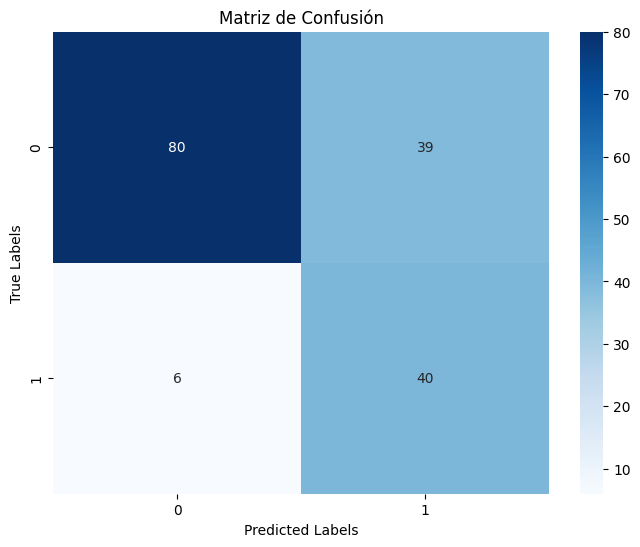

In [104]:
if not os.path.exists(ruta_modelos+'/modelo_AD_SMOTESVM_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_AD = {
      'classifier__criterion': ['gini'],  # Criterio
      'classifier__max_depth': [3]  # Profundidad máxima
  }

  # Configurar SVMSMOTE
  svmSmote = SVMSMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('svmSmote', svmSmote),             # Aplicación de SVMSMOTE
      ('classifier', DecisionTreeClassifier(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_AD_SMOTESVM_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_AD,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_AD_SMOTESVM_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_AD_SMOTESVM_CR, ruta_modelos+'/modelo_AD_SMOTESVM_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_AD_SMOTESVM_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_AD_SMOTESVM_CR = joblib.load(ruta_modelos+'/modelo_AD_SMOTESVM_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_AD_SMOTESVM_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_AD_SMOTESVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__criterion': 'gini', 'classifier__max_depth': 3}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.60 y el F1-score de test es de 0.64. Se ha obtenido 0.72 de Accuracy, 0.50 de Precision y 0.86 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" y algo bien "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 80 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 40 vehículos de tipo "coche".
*   Se han detectado 6 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 39 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### Borderline\-SMOTE SVM: Red neuronal



F1 Train: 0.6598984771573604
F1 Test: 0.6545454545454545
Accuracy: 0.7696969696969697
Precision: 0.5625
Recall: 0.782608695652174


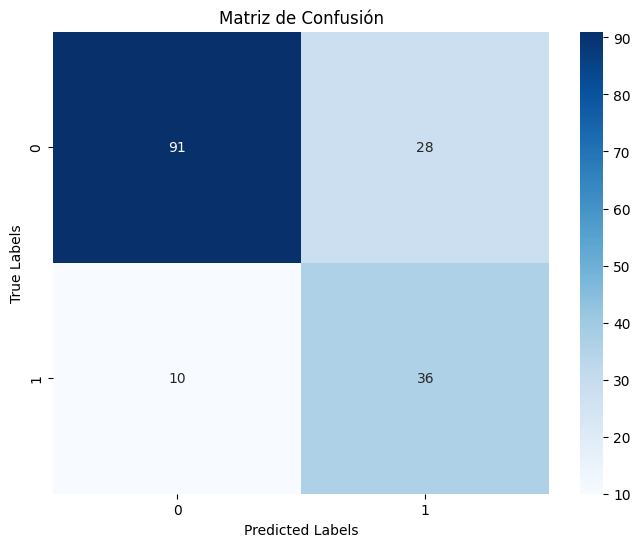

In [110]:
if not os.path.exists(ruta_modelos+'/modelo_RN_SMOTESVM_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_RN = {
      'classifier__hidden_layer_sizes': [1024],  # Capa oculta
      'classifier__activation': ['logistic'],  # Función de activación
      'classifier__solver': ['lbfgs'],  # Método de optimización
      'classifier__max_iter': [100]  # Número máximo de iteraciones
  }

  # Configurar SVMSMOTE
  svmSmote = SVMSMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('svmSmote', svmSmote),             # Aplicación de SVMSMOTE
      ('classifier', MLPClassifier(random_state=semilla))  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_RN_SMOTESVM_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_RN,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_RN_SMOTESVM_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_RN_SMOTESVM_CR, ruta_modelos+'/modelo_RN_SMOTESVM_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_RN_SMOTESVM_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_RN_SMOTESVM_CR = joblib.load(ruta_modelos+'/modelo_RN_SMOTESVM_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_RN_SMOTESVM_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_RN_SMOTESVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__activation': 'logistic', 'classifier__hidden_layer_sizes': 1024, 'classifier__max_iter': 100, 'classifier__solver': 'lbfgs'}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.65 y el F1-score de test es de 0.65. Se ha obtenido 0.72 de Accuracy, 0.50 de Precision y 0.86 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta bastante bien "coche" y "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 91 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 36 vehículos de tipo "coche".
*   Se han detectado 10 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 28 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

##### Borderline\-SMOTE SVM: K\-Vecinos



F1 Train: 0.6696629213483146
F1 Test: 0.6554621848739496
Accuracy: 0.7515151515151515
Precision: 0.5342465753424658
Recall: 0.8478260869565217


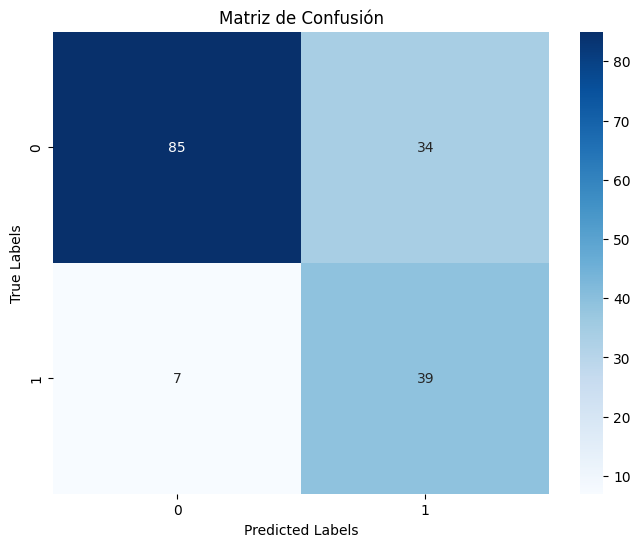

In [107]:
if not os.path.exists(ruta_modelos+'/modelo_KNN_SMOTESVM_CR.pkl'): # Comprobamos si el modelo está ya entrenado, en caso contrario se entrena
  param_grid_knn = {
      'classifier__n_neighbors': [3,5,7, 9, 11],  # Número de vecinos
      'classifier__weights': ['uniform', 'distance'],    # Ponderación de los vecinos
      'classifier__metric': ['euclidean','minkowski']  # Métrica de distancia
  }

  # Configurar SVMSMOTE
  svmSmote = SVMSMOTE(random_state=semilla)

  # Configurar el pipeline
  pipeline = Pipeline(steps=[
      ('svmSmote', svmSmote),             # Aplicación de SVMSMOTE
      ('classifier', KNeighborsClassifier())  # Modelo
  ])

  stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=semilla)  # Validación cruzada estratificada

  # Obtención de la mejor configuración de hiperparámetros del grid, utiliza validación cruzada
  modelo_KNN_SMOTESVM_CR = GridSearchCV(estimator=pipeline,param_grid=param_grid_knn,cv=stratified_kfold,scoring='f1')

  # Entrenar el modelo
  modelo_KNN_SMOTESVM_CR.fit(X_train_cocheRadarDF_escaladas, y_train_cocheRadarDF)

  # Guardar modelo
  joblib.dump(modelo_KNN_SMOTESVM_CR, ruta_modelos+'/modelo_KNN_SMOTESVM_CR.pkl')

  # Imprimir los mejores hiperparámetros encontrados
  print("Mejores hiperparámetros:", modelo_KNN_SMOTESVM_CR.best_params_)

else: # Si el modelo está ya entrenado se carga para ahorrar el tiempo del entrenamiento
  # Se carga el modelo
  modelo_KNN_SMOTESVM_CR = joblib.load(ruta_modelos+'/modelo_KNN_SMOTESVM_CR.pkl')

# Realizar las predicciones
y_pred_train = modelo_KNN_SMOTESVM_CR.predict(X_train_cocheRadarDF_escaladas)
y_pred = modelo_KNN_SMOTESVM_CR.predict(X_test_cocheRadarDF_escaladas)

# Calcular las métricas
accuracy = accuracy_score(y_test_cocheRadarDF, y_pred)
f1 = f1_score(y_test_cocheRadarDF, y_pred)
precision = precision_score(y_test_cocheRadarDF, y_pred)
sensibilidad_recall = recall_score(y_test_cocheRadarDF, y_pred)
f1_train = f1_score(y_train_cocheRadarDF, y_pred_train)

# Imprimir los resultados de las métricas
print("F1 Train: " +str(f1_train))
print("F1 Test: " +str(f1))
print("Accuracy: "+str(accuracy))
print("Precision: "+str(precision))
print("Recall: "+str(sensibilidad_recall))

# Mostramos la matriz de confusión (1: coche, 0: otros)
cm = confusion_matrix(y_test_cocheRadarDF, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Matriz de Confusión')
plt.show()

Mejores hiperparámetros: {'classifier__metric': 'euclidean', 'classifier__n_neighbors': 11, 'classifier__weights': 'uniform'}

Como se puede apreciar no hay overfitting, el F1-score del train es de 0.66 y el F1-score de test es de 0.65. Se ha obtenido 0.75 de Accuracy, 0.53 de Precision y 0.84 de Recall. Observando el F1-score, podemos ver que el modelo funciona medianamente bien, detecta muy bien "coche" y más o menos bien "otros". Esto se puede ver mejor en la matriz de confusión:


*   Se han logrado detectar correctamente 85 vehículos de tipo "otros".
*   Se han logrado detectar correctamente 39 vehículos de tipo "coche".
*   Se han detectado 7 vehículos como si fueran de tipo "otros" pero en realidad son de tipo "coche".
*   Se han detectado 34 vehículos como si fueran de tipo "coche" pero en realidad son de tipo "otros".

## Conclusiones

| Modelo                               | F1_Train | F1_Test | Accuracy | Precision | Recall                              |
|---------------------------------------|-----------|-----------|-------------|-------------|---------------|
| SVM  | 0.58 | 0.59|0.78| 0.61| 0.56|
| Árbol de decisión |0.62 | 0.53|0.78| 0.68| 0.43|
| Red neuronal |0.82 | 0.70|0.83| 0.70| 0.71|
| K-Vecinos |0.68 | 0.55|0.75| 0.55| 0.56|
| SMOTE: SVM  | 0.68 | 0.68|0.77| 0.56| 0.86|
| SMOTE: Árbol de decisión |0.64 | 0.61|0.72| 0.50| 0.78|
| SMOTE: Red neuronal |0.83 | 0.73|0.83| 0.67| 0.80|
| SMOTE: K-Vecinos |0.65 | 0.62|0.70| 0.48| 0.86|
| Borderline_SMOTE: SVM  | 0.67 | 0.68|0.77| 0.56| 0.89|
| Borderline_SMOTE: Árbol de decisión |0.68 | 0.70|0.77| 0.55| 0.95|
| Borderline_SMOTE: Red neuronal |0.74 | 0.71|0.81| 0.62| 0.82|
| Borderline_SMOTE: K-Vecinos |0.65 | 0.60|0.69| 0.47| 0.82|
| ADASYN: SVM  | 0.67 | 0.69|0.78| 0.56| 0.89|
| ADASYN: Árbol de decisión |0.69 | 0.60|0.67| 0.45| 0.86|
| ADASYN: Red neuronal |0.67 | 0.70|0.80| 0.60| 0.84|
| ADASYN: K-Vecinos |0.65 | 0.65|0.73| 0.51| 0.91|
| Borderline_SMOTE SVM: SVM  | 0.66 | 0.68|0.77| 0.56| 0.86|
| Borderline_SMOTE SVM: Árbol de decisión |0.60 | 0.64|0.72| 0.50| 0.86|
| Borderline_SMOTE SVM: Red neuronal |0.65 | 0.65|0.76| 0.56| 0.78|
| Borderline_SMOTE SVM: K-Vecinos |0.66 | 0.65|0.75| 0.53| 0.84|


Para comprobar si hay overfitting hay que comparar los resultados de F1_Train y los de F1_Test, si el F1_Train es bastante mayor a F1_Test entonces hay overfitting. De ahora en adelante se hablará de F1-score refiriéndonos a F1-Test. Tras obtener todos los modelos y analizar sus métricas, podemos afirmar lo siguiente:


*   La técnica que mejor resultado da sin prácticamente nada de overfitting es la de Borderline_SMOTE. Todos sus modelos han dado resultados en torno a 0.70, solamente K-Vecinos ha dado un resultado algo más bajo, de 0.6. SVM y árboles de decisión no tienen overfitting, la red neuronal tiene un poco de overfitting, pero al ser tan bajo no supone ningún problema. El mejor modelo sería la red neuronal con un 0.71 seguido muy de cerca, por no decir igual de bueno, por el árbol de decisión con un 0.70 de F1-score.
*   La técnica de Borderline_SMOTE SVM ha dado resultados medianamente buenos también, pero no llegan a rondar el 0.70 de F1-score, se quedan en torno al 0.65. Destaca el que no haya dado absolutamente nada de overfitting y su mejor modelo sería la SVM con F1-score de 0.68, sus otros modelos son bastante similares siendo aproximadamente de 0.65 de F1-score.
*  La técnica SMOTE ha dado resultados algo más bajos que la técnica anterior. Podría destacar el 0.73 de F1-score de la red neuronal, pero aquí tenemos un overfitting (0.83) con el que ya sí hay que tener más cuidado y se ha tomado la decisión de descartar este modelo. El resto de modelos presenta bastante poco overfitting pero los modelos no son muy buenos teniendo solo 0.61 y 0.62, el único útil sería la SVM con un 0.68 de F1-score y sin nada de overfitting.
*  La técnica de ADASYN da por lo general resultados medianamente buenos a excepción del árbol de decisión donde el F1-score es bajo con un 0.60 y tiene un overfitting (0.69) que puede ser peligroso. Destaca la red neuronal con un 0.70 de F1-score y el 0.69 de la SVM, ninguno tiene overfitting.
*  Los modelos sin ninguna técnica son los que dan peores resultados y más overfitting, el único modelo que podría ser útil sería el de la SVM con un 0.59 de F1-score sin nada de overfitting. El resto de modelos dan un overfitting considerable y por ello se han descartado. El árbol de decisión daría un 0.53, la red neuronal un 0.70 y K-Vecinos un 0.55.
*  El modelo de forma general que mejor se comporta, auqnue no de el mejor resultado de todos, es el de SVM. No da nada de overfitting y sus F1-score están en torno al 0.68 y 0.69. El único que da un F1-score menor es el que no usa ninguna técnica. Esto tal vez se puede deber a que SVM trabaja bastante bien en fronteras bien definidas y, al crear datos sintéticos, se ayuda a delimitar esta frontera.
*  Las redes neuronales parecen dar resultados bastante buenos, pero tienden a caer en la mayoría de ocasiones en overfitting. Esto tal vez se pueda arreglar con una mejor configuración de hiperparámetros, pero esto requeriría mucho más tiempo de entrenamiento y realizar una gran cantidad de pruebas.
*   Los árboles de decisión dan buenos resultados dependiendo del modelo, pueden resultar de gran utilidad en ciertas ocasiones como por ejemplo en el Borderline-SMOTE.
*   Los K-Vecinos son los modelos que no han dado ningún resultado que supere al resto. Aunque, eso sí, no tiene overfitting (salvo el desbalanceado) y sus resultados no son del todo malos, no son los mejores obtenidos pero tampoco se quedan muy lejos, podrían resultar útiles en ciertos contextos.

El mejor modelo por tanto, sería la red neuronal con la técnica de Borderline-Smote. Tiene un F1-score de 0.71 y un overfitting relativamente bajo (0.74), destaca en especial que es capaz de detectar bastante bien tanto "coche" como "otros", hay que tener en cuenta que la tendencia que han tenido los modelos es a dar resultados no muy buenos a la hora de detectar "otros".

Volviendo a la cuestión: _¿Es posible tratar un problema de desbalanceo con técnicas que no tienen en cuenta el desbalanceo?_. La respuesta a este pregunta es depende. Claramente los modelos con técnicas de balanceo han dado modelos bastante mejores y no han tenido un overfitting considerable a excepción de algún caso puntual. No obstante, es posible tratar un problema como este sin ninguna técnica de balanceo, por ejemplo, SVM no ha funcionado del todo mal. Eso sí, por lo que se acaba de ver con estos resultados, no se va a poder obtener un resultado tan bueno como los resultados con técnicas de balanceo.

